# Reporte: Equipo 4
*Laura Tejada, Santiago Battezatti, Rafael Ortega, Sebastián Cadavid-Sánchez*
***
**Práctica 1 - Parte 2**

# Implementación de Algoritmo Ant Colony 

En esta parte de la práctica se implementó el algoritmo Ant Colony Para resolver el problema del Traveller Salesman Problem (TSP)

## Traveller Salesman Problem:

En su forma clásica, este problema se lo llama de esta manera porque se considera a una persona que debe encontrar la mejor ruta para entregar una serie de paquetes en una cantidad de lugares determinados. 

## Problema de Optimización a resolver:

El problema de optimización consiste en encontrar la mejor ruta, dada una serie de nodos (los lugares a visitar), y una matriz de costos o distancias, en la que se establece el costo de ir de cada uno de los nodos a todos los demás. 

## Algoritmo: Ant Colony Optimization 

Ant Colony Optimization (ACO) es un algoritmo que busca resolver el problema del TSP. Para ello, ACO simula el funcionamiento de una colonia de hormigas, de ahí su nombre. Para ello, el algoritmo envía hormigas que van eligiendo diferentes caminos, y en su trayectoría van dejando feromonas. Esto sucede en la realidad, ya que las hormigas son animales ciegos, que para elegir su camino se guían principalmente por el olor de feromonas dejado por otras hormigas. En la práctica, lo que sucede es que a medida que un camino va siendo tomado con mayor frecuencia, ese camino cuenta con mayor cantidad de feromonas, lo que hace que sea más probable que las siguientes hormigas tomen ese mismo camino. A través de una iteración de homigas que de manera secuencial van recorriendo diferentes caminos (dejando feromonas y guiándose en parte por las feromonas previas que encuentran en su camino) el algoritmo realiza el proceso de encontrar el mejor camino para resolver el TSP. 

## Implementación del algoritmo en dos datasets: 

A continuación, se realiza la implementación del algoritmo en dos datasets, mismos que fueron descargados [aquí](https://people.sc.fsu.edu/~jburkardt/datasets/tsp/tsp.html).


 - El primer dataset, GR17, tiene 17 destinos. 

 - El segundo data set, Dantzig, cuenta con 42 destinos. 

## Instalación del paquete de python: 

In [1]:
import sys
sys.path.append('..')

In [2]:
#Install package in local computer:
!pip install src/.

Processing ./src
  Created wheel for ant-colony: filename=ant_colony-0.1-py3-none-any.whl size=5186 sha256=04a839d84b2ce053634275924f3b1760333192914a43f5a8c24b3e1be7cb82aa
  Stored in directory: /tmp/pip-ephem-wheel-cache-pjrtxu6b/wheels/b1/c3/9c/7c22ba08be3acf6a678409173337d57d8ba00fe9de57c74039
Successfully built ant-colony
  Attempting uninstall: ant-colony
    Found existing installation: ant-colony 0.1
    Uninstalling ant-colony-0.1:
      Successfully uninstalled ant-colony-0.1


In [3]:
# importamos
from ant_colony.aco_tsp import *

## Primer data set: GR17 

In [4]:
#Cargamos el dataset
data_path2 = 'datasets/gr17.tsp'

Cargar grafo con los datos y realizar construcciones intermedias

In [5]:
# lectura de datos en formato tsp
problem = tsplib95.load(data_path2)
# convertir a grafo 
G = problem.get_graph()
# matrix numerica para diccionario de distancias
G_num = nx.to_numpy_matrix(G)
# diccionario de distancias
dic_dists = create_dic_dist_from_graph(G)

# inicializacion de atraccion y feromonas
tau = init_ferom(G)
eta = init_atrac(G,dic_dists)
A = atraccion_nodos(G, tau, eta, alpha=1, beta=5)

Visualización del grafo

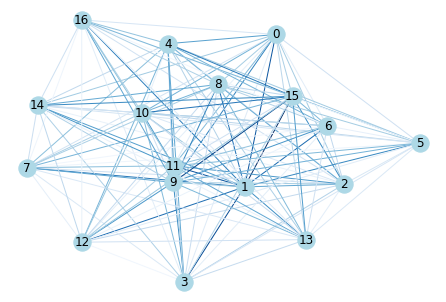

In [6]:
plot_graph(G, m_plot='graph')

Ruta encontrada por una hormiga

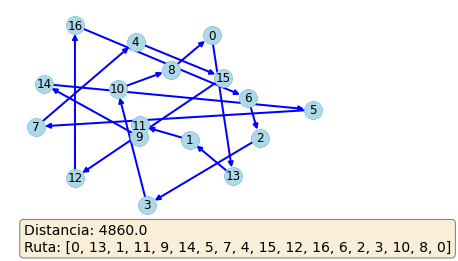

In [7]:
route, dist = hormiga_recorre(G,dic_dists, A, tau, 0, x_best=[], y_best= float('inf'))
graph_optim_path(G, route, dist)

Colonia de hormigas

iter: 1 / 500 - dist: 4847.0
iter: 20 / 500 - dist: 4671.0
iter: 40 / 500 - dist: 4671.0
iter: 60 / 500 - dist: 4671.0
iter: 80 / 500 - dist: 4671.0
iter: 100 / 500 - dist: 4671.0
iter: 120 / 500 - dist: 4671.0
iter: 140 / 500 - dist: 4671.0
iter: 160 / 500 - dist: 4671.0
iter: 180 / 500 - dist: 4671.0
iter: 200 / 500 - dist: 4671.0
iter: 220 / 500 - dist: 4671.0
iter: 240 / 500 - dist: 4671.0
iter: 260 / 500 - dist: 4671.0
iter: 280 / 500 - dist: 4671.0
iter: 300 / 500 - dist: 4671.0
iter: 320 / 500 - dist: 4671.0
iter: 340 / 500 - dist: 4671.0
iter: 360 / 500 - dist: 4671.0
iter: 380 / 500 - dist: 4671.0
iter: 400 / 500 - dist: 4671.0
iter: 420 / 500 - dist: 4671.0
iter: 440 / 500 - dist: 4671.0
iter: 460 / 500 - dist: 4671.0
iter: 480 / 500 - dist: 4671.0
iter: 500 / 500 - dist: 4671.0


------------------------------
Resumen:
	Nro. de hormigas: 3
	Iteraciones: 500
	Distancia: 4671.0
	Nodo inicial: 0
	Ruta: [0, 16, 1, 8, 9, 15, 13, 10, 3, 14, 7, 6, 5, 4, 11, 2, 12, 0]
--------------

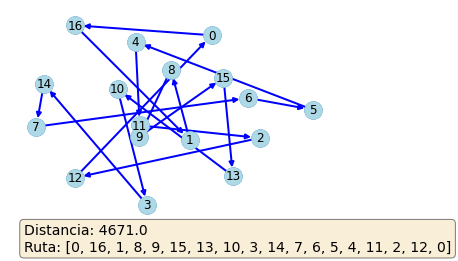

In [8]:
# antcolony
ruta, dist = ant_colony(G, dic_dists, init=0, ants=3, max_iter=500, verbose=20)

 Aquí se puede leer la mejor ruta encontrada y la distancia recorrida de 4671

## Segundo data set: Dantzig

In [9]:
#Cargamos el dataset
data_dantzig_txt = 'datasets/dantzig42_d.txt'
d_datntzig = np.loadtxt(data_dantzig_txt)

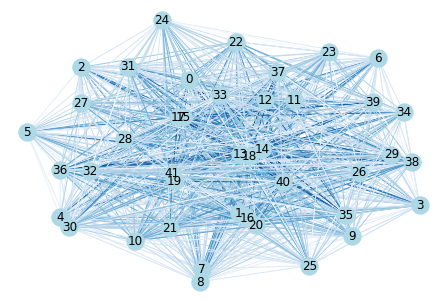

In [10]:
# diccionario de distancias
lenghts = create_dic_dist(d_datntzig)
# crear grafo
G = nx.from_numpy_matrix(d_datntzig)
# grafo
plot_graph(G, m_plot='graph')

iter: 1 / 500 - dist: 808.0
iter: 20 / 500 - dist: 702.0
iter: 40 / 500 - dist: 702.0
iter: 60 / 500 - dist: 702.0
iter: 80 / 500 - dist: 702.0
iter: 100 / 500 - dist: 702.0
iter: 120 / 500 - dist: 702.0
iter: 140 / 500 - dist: 702.0
iter: 160 / 500 - dist: 702.0
iter: 180 / 500 - dist: 702.0
iter: 200 / 500 - dist: 702.0
iter: 220 / 500 - dist: 702.0
iter: 240 / 500 - dist: 702.0
iter: 260 / 500 - dist: 702.0
iter: 280 / 500 - dist: 702.0
iter: 300 / 500 - dist: 702.0
iter: 320 / 500 - dist: 702.0
iter: 340 / 500 - dist: 702.0
iter: 360 / 500 - dist: 702.0
iter: 380 / 500 - dist: 702.0
iter: 400 / 500 - dist: 702.0
iter: 420 / 500 - dist: 702.0
iter: 440 / 500 - dist: 702.0
iter: 460 / 500 - dist: 702.0
iter: 480 / 500 - dist: 702.0
iter: 500 / 500 - dist: 702.0


------------------------------
Resumen:
	Nro. de hormigas: 3
	Iteraciones: 500
	Distancia: 702.0
	Nodo inicial: 0
	Ruta: [0, 8, 18, 35, 15, 39, 21, 3, 27, 16, 4, 23, 29, 19, 38, 24, 34, 25, 10, 30, 36, 28, 33, 11, 6, 5, 41, 

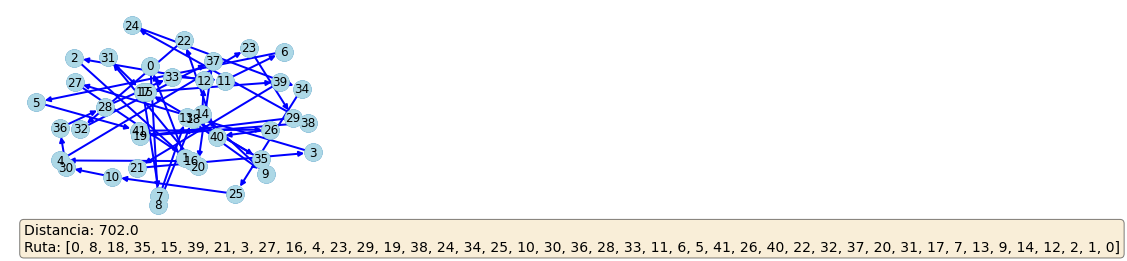

In [11]:
# antcolony
ruta, dist = ant_colony(G, lenghts, init=0, ants=3, max_iter=500, verbose=20)

Aquí podemos observar la mejor ruta encontrada por el algoritmo, la cual tiene una distancia de 702 

### Referencias

1. [Problema del Viajante](https://es.wikipedia.org/wiki/Problema_del_viajante) (2021) Wikipedia
2. [Programación Lineal (PL) y Método Símplex](https://itam-ds.github.io/analisis-numerico-computo-cientifico/IV.optimizacion_en_redes_y_prog_lineal/4.2/Programacion_lineal_y_metodo_simplex.html) (2021) Erick Palacios
3. [Data for teh Traveling Salesperson Problem](https://people.sc.fsu.edu/~jburkardt/datasets/tsp/tsp.html) (2019) People Sc
4. Kochenderfer, M. J., & Wheeler, T. A. (2019). Algorithms for optimization. Mit Press.